<a href="https://colab.research.google.com/github/AnastasiyaKrokhina/DataCon-time-1/blob/main/notebooks/data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#satisfying requirements
from pip._internal import main 
packages = ('traitlets', 
            'IPython', 
            'ipywidgets',
            'catboost', 
            'category-encoders',
            'pandas', 
            'numpy', 
            'seaborn', 
            'sklearn',
            'matplotlib',
            'pymatgen',
            'pprint')
for package in packages:
    try:
        __import__(package)
    except ImportError:
        main(['install', package.split()[0]])



import seaborn as sns
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from pymatgen.ext.matproj import MPRester
from pprint import pprint
MP_API_KEY = "lnFh1UTkg0QO8WxK" #ключ доступа 
m = MPRester(MP_API_KEY)
from pymatgen.core.periodic_table import Element
from pymatgen.core.composition import Composition
from pymatgen.core.structure import Structure, IStructure, Molecule, IMolecule
from pymatgen.core.lattice import Lattice
from pymatgen.core.ion import Ion
from pymatgen.ext.matproj import MPRester
from monty.json import MontyEncoder, MontyDecoder, MSONable


dataset1=pd.read_excel('https://github.com/AnastasiyaKrokhina/DataCon-time-1/blob/main/data/Database_1.xlsx?raw=true') 
dataset2=pd.read_excel('https://github.com/AnastasiyaKrokhina/DataCon-time-1/blob/main/data/Database_2.xlsx?raw=true')
dataset3=pd.read_excel('https://github.com/AnastasiyaKrokhina/DataCon-time-1/blob/main/data/Database_3.xlsx?raw=true')
dataset4=pd.read_excel('https://github.com/AnastasiyaKrokhina/DataCon-time-1/blob/main/data/Database_4.xlsx?raw=true')
dataset5=pd.read_excel('https://github.com/AnastasiyaKrokhina/DataCon-time-1/blob/main/data/Database_5.xlsx?raw=true')

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
NumExpr defaulting to 2 threads.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pymatgen: filename=pymatgen-2022.0.17-cp37-cp37m-linux_x86_64.whl size=41840993 sha256=d6b0df17a3d048b0061a0d0881bcd5fc1c625fc11dcb6a8708d6a7023759a4f9
  Stored in directory: /root/.cache/pip/wheels/cf/f6/22/58a9be23c5f1b452770e02ff42047175eaf0f9c2f15219fc76
Successfully built pymatgen


In [2]:
# в этом датасете содержатся также данные по органическим наночастицам и частицам различных аллотропных модификаций углерода

In [3]:
dataset3['Exposure dose (g/L)'] = dataset3['Concentration (ug/ml)'] * 10**(-6)/(10**(-3)) #концентрация из микрограмм на миллилитр в g/L
dataset3.rename(columns = {'Material': 'Material type', 'Coat/Functional Group': 'Coat', 'Zeta_in_Water (mV)':'Surface charge (mV)',
                           'Size_in_Water (nm)': 'Hydro size (nm)', 'Cell_Type': 'cell_line', 'Cell_Tissue': 'cell_origin', 
                           'Cell Line_Primary Cell': 'Cell type', 'Cell_Viability (%)': 'Viability (%)', 'Time (hr)':'time' }, inplace=True)

In [4]:
dataset3.drop(['No', 'Year', 'Synthesis_Method','Size_in_Medium (nm)', 'Zeta_in_Medium (mV)', 'No_of_Cells (cells/well)', 
               'Cell_Morphology', 'Cell_Age', 'Test', 'Test_Indicator',
               'PDI', 'Article_ID', 'DOI', 'Surface_Charge', 'Concentration (ug/ml)', 'Human_Animal', 'Shape'], inplace = True, axis = 1) #удаляем неинформативные столбцы

In [5]:
dataset2.drop(['Publication year', 'Reference DOI', 'Interference checked (Y/N)', 'Colloidal stability checked (Y/N)', 'Positive control (Y/N)', 'Particle ID', 'Biochemical metric', 'Cell morphology',
               'Human(H)/Animal(A) cells', 'Test', 'Test indicator'], inplace = True, axis = 1) #удаляем неинформативные столбцы 

In [6]:
dataset2['Concentration μM'] = dataset2['Concentration μM'] * dataset1['Molecular weight (g/mol)']* 10**(-6) #концентрация из microM  в g/L
  #эту ячейку исполнять только один раз! :) иначе концентрация обновится

In [7]:
dataset2.rename({
    'Nanoparticle': 'Material type',   
    'Zeta potential (mV)': 'Surface charge (mV)', 
    'Concentration μM':'Exposure dose (g/L)',
    '% Cell viability': 'Viability (%)',
    'Test indicator': 'Test_indicator',
    'Cell age: embryonic (E), Adult (A)':'Cell age',
    'Cell line (L)/primary cells (P)':'Cell type',
    'Animal?':'Cell_Source',
    'Cell-organ/tissue source': 'cell_origin',
    'Cells': 'cell_line',
    'coat':'Coat',
    'Type: Organic (O)/inorganic (I)': 'Type',
    'Exposure time (h)': 'time',
    'Human(H)/Animal(A) cells': 'cell_species'}, inplace=True, axis=1)

In [8]:
datasets2_3 = dataset2.append(dataset3, ignore_index=True)

In [9]:
datasets2_3['Cell_Source'] = datasets2_3['Cell_Source'].fillna('Human') #если животное пропущено, значит это были человеческие клетки 


datasets2_3['Coat'] = datasets2_3['Coat'].fillna('0') # пустоты имеют физический смысл, сделаем новый класс для них 

In [10]:
datasets2_3['Viability (%)']=datasets2_3['Viability (%)'].apply(lambda row: 0 if (row<0) else row)

In [11]:
def replacement(df, Colname, labels, new_labels):   #функция приводит  названия к общему виду
  df[Colname] = df[Colname].replace(labels,new_labels, regex = True)

In [12]:
datasets2_3['Material type_copy']=datasets2_3['Material type']

In [13]:
labels = ['CeO2', 'Se', 'CuO', 'Copper Oxide', 'CuS', 'ZnO', 'Zinc oxide',
       'Iron oxide', 'TiO2', 'Ti', 'Cr', 'Co', 'Co3O4', 'CdO', 'MnO',
       'Bi', 'Mo', 'Pt', 'Hydroxyapatite', 'Cu2O', 'MgO', 'Al2O3', 'QDs',
       'SiO2', 'Au', 'Ag', 'Eudragit RL', 'Dendrimer', 'PLGA',
       'Polystyrene', 'Liposomes', 'SLN', 'Carbon Nanotubes', 'Carbon NP',
       'Chitosan', 'QD', 'IronOxide', 'Dendrmer', 'Alginate', 'PTFE-PMMA',
       'MWCNT', 'HAP', 'Ni', 'EudragitRL', 'Carbon', 'ZrO2', 'C60', 'C70',
       'SWCNT', 'Diamond', 'Graphite', 'Fe2O3', 'IronOxide', 'NiO', 'Ay',
       'Cu', 'Ce O2', 'Bi2O3','IronOide']
new_labels = ['CeO2', 'Se', 'CuO', 'CuO', 'CuS', 'ZnO', 'ZnO',
       'Fe3O4', 'TiO2', 'Ti', 'Cr', 'Co', 'Co3O4', 'CdO', 'MnO',
       'Bi', 'Mo', 'Pt', 'Ca10(PO4)6(OH)2', 'Cu2O', 'MgO', 'Al2O3', 'QDs',
       'SiO2', 'Au', 'Ag', 'Eudragit RL', 'Dendrimer', 'PLGA',
       'Polystyrene', 'Liposomes', 'SLN', 'Carbon Nanotubes', 'Carbon NP',
       'Chitosan', 'QD', 'Fe3O4', 'Dendrimer', 'C6H7O6Na', 'PTFE-PMMA',
       'MWCNT', 'Ca10(PO4)6(OH)2', 'Ni', 'EudragitRL', 'Carbon', 'ZrO2', 'C60', 'C70',
       'SWCNT', 'Diamond', 'Graphite', 'Fe2O3', 'Fe3O4', 'NiO', 'Au',
       'Cu', 'CeO2', 'Bi2O3', 'Fe3O4']
replacement(datasets2_3,'Material type', labels, new_labels)

In [14]:
datasets2_3.dropna(how='all') #убирает полностью пустые строки

,Material type,Type,Coat,Diameter (nm),Exposure dose (g/L),Surface charge (mV),cell_line,Cell type,Cell_Source,Cell age,cell_origin,time,Viability (%),Hydro size (nm),Aspect_Ratio,Material type_copy
0,CeO2,I,0,20.3,1.970989e-07,NaN,L929,L,Mouse,A,Areolar tissue,24,105.58918,NaN,NaN,CeO2
1,CeO2,I,0,20.3,4.032914e-07,NaN,L929,L,Mouse,A,Areolar tissue,24,103.02621,NaN,NaN,CeO2
2,CeO2,I,0,20.3,8.065828e-07,NaN,L929,L,Mouse,A,Areolar tissue,24,104.85748,NaN,NaN,CeO2
3,CeO2,I,0,20.3,1.613166e-06,NaN,L929,L,Mouse,A,Areolar tissue,24,100.09670,NaN,NaN,CeO2
4,CeO2,I,0,20.3,6.258968e-06,NaN,L929,L,Mouse,A,Areolar tissue,24,97.53237,NaN,NaN,CeO2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,Polystyrene,O,NH2,NaN,1.000000e-05,NaN,THP-1,L,Human,NaN,Blood,48,100.00000,NaN,NaN,Polystyrene
7003,Polystyrene,O,NH2,NaN,1.000000e-04,NaN,THP-1,L,Human,NaN,Blood,48,114.57000,NaN,NaN,Polystyrene
7004,Polystyrene,O,NH2,NaN,1.000000e-03,NaN,THP-1,L,Human,NaN,Blood,48,119.65000,NaN,NaN,Polystyrene
7005,Polystyrene,O,NH2,NaN,1.000000e-02,NaN,THP-1,L,Human,NaN,Blood,48,117.22000,NaN,NaN,Polystyrene


In [15]:
datasets2_3.pop('Cell age') #слишком много нанов и в других таблицах возраста нет


0         A
1         A
2         A
3         A
4         A
       ... 
7002    NaN
7003    NaN
7004    NaN
7005    NaN
7006    NaN
Name: Cell age, Length: 7007, dtype: object

In [16]:
datasets2_3['Coat'] = np.where((datasets2_3['Coat'] == '0'), None, datasets2_3['Coat']) # присутствуют и 0, и None

In [17]:
 datasets2_3['Coat'] = datasets2_3['Coat'].fillna('naked')

In [18]:
db1_4_5 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/DataCon-time-1/main/data/db1_4_5_new.csv', delimiter = ',', index_col=0)


In [19]:
db1_4_5.rename(columns={'cell_species':'Cell_Source'})

,Material type,Elements,Ionic radius,Core size (nm),Hydro size (nm),Surface charge (mV),Surface area (m2/g),Cell type,Exposure dose (ug/mL),Topological polar surface area (Å²),...,Density (g/cm3),Viability (%),cell_line,Cell_Source,cell_origin,time,toxicity,average electronegativity,Molecular weight (g/mol),Number of atoms
0,CuO,Cu,73.0,12.8,313.8,7.6,74.2,1,200.0,17.1,...,6.97,9.1000,NaN,NaN,NaN,NaN,NaN,2.670,79.54540,2.0
1,ZnO,Zn,74.0,22.6,114.7,28.8,47.4,0,200.0,17.1,...,5.44,9.5000,NaN,NaN,NaN,NaN,NaN,2.545,81.40840,2.0
2,ZnO,Zn,74.0,22.6,114.7,28.8,47.4,0,100.0,17.1,...,5.44,10.2000,NaN,NaN,NaN,NaN,NaN,2.545,81.40840,2.0
3,ZnO,Zn,74.0,22.6,69.4,28.8,47.4,1,100.0,17.1,...,5.44,11.0000,NaN,NaN,NaN,NaN,NaN,2.545,81.40840,2.0
4,Mn2O3,Mn,58.0,51.5,291.7,-46.1,25.9,1,200.0,43.4,...,4.59,11.3000,NaN,NaN,NaN,NaN,NaN,2.684,157.87429,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,ZnO,NaN,NaN,35.6,236.0,-41.6,27.9,Cancer,1.0,17.1,...,5.44,127.4363,Caco_2,Human,Colon,48.0,nonToxic,2.545,81.40840,2.0
2132,ZnO,NaN,NaN,35.6,236.0,-41.6,27.9,Cancer,10.0,17.1,...,5.44,116.3751,Caco_2,Human,Colon,48.0,nonToxic,2.545,81.40840,2.0
2133,ZnO,NaN,NaN,35.6,236.0,-41.6,27.9,Cancer,100.0,17.1,...,5.44,40.8796,Caco_2,Human,Colon,48.0,Toxic,2.545,81.40840,2.0
2134,ZnO,NaN,NaN,35.6,236.0,-41.6,27.9,Cancer,0.1,17.1,...,5.44,86.8566,Caco_2,Human,Colon,24.0,nonToxic,2.545,81.40840,2.0


In [20]:
db1_4_5['Viability (%)']=db1_4_5['Viability (%)'].apply(lambda row: 0 if (row<0) else row)

In [21]:
db1_4_5['Exposure dose (g/L)'] = db1_4_5['Exposure dose (ug/mL)']/1000 #концентрация из ug/ml в g/L
  #эту ячейку исполнять только один раз! :) иначе концентрация обновится
db1_4_5.pop('Exposure dose (ug/mL)')

0       200.0
1       200.0
2       100.0
3       100.0
4       200.0
        ...  
2131      1.0
2132     10.0
2133    100.0
2134      0.1
2135      1.0
Name: Exposure dose (ug/mL), Length: 2136, dtype: float64

In [22]:
coats = ['l-cysteine l-lysine l-lysine', 'Dextran', 'PEI',       #сделала просто категориальный признак есть coat или нет
       'PEG to the PEI', 'PEG', 'PEG-NH2', 'BSA', 'alginate', 'COOH',
       'NH2', 'dimercaptosuccinic',
       'folic acid with intermediate organic (PEG) coating',
       'folic acid with intermediate inorganic (silica) coating',
       'Digestive enzymes', 'simethicone then esters on top',
       'alumina-simethicone', 'silica', 'PVP', 'Folic acid',
       'D-penicillamine (NH2/COOH)', '3-mercaptopropionic acid (COOH)',
       'cysteamine (NH2)', 'cysteamine', 'Zn then cysteamine', 'SGF',
       'TGA-gelatine', 'TGA', 'CTAB', 'Phosphonate', 'PEG-OCH3',
       'PEG-COOH', 'Citrate and PVP', 'Citrate', 'Starch', 'Gum Arabic',
       'Star anise', 'Sodium borohydride', 'Chitosan', 'PVA',
       'Poloxamer 188 (Pluronic F68)', 'metal catalyst residues',
       'Tween 80', 'COONa', 'SO3Na', 'Hyaluronic acid ',
       'Hyaluronic acid', 'Ph', 'None', 'DPA', 'MPA', 'CyA', 'Silica',
       'CKK', 'Ac', 'C12', 'OH', 'OS', 'SC', 'Poloxamer', 'PEA', 'PEG-FA',
       'Silica-FA', 'SodiumAlginate', 'Liposome', 'OleicAcid',
       'Silica-NH2', 'DMSA', 'MSA', 'CYS', 'GSH', 'PAMAM', 'Urea', 'DPPC',
       'DHLA', 'FA', 'DDAB', 'Tween80', 'Citrate-Lactose',
       'Citrate-Oligonucleotide', 'CH3', 'AscorbicAcid']
datasets2_3['Coat'] = np.where((datasets2_3['Coat'] == 'naked'), 0, datasets2_3['Coat']) # присутствуют и 0, и None
for coat in coats:
  datasets2_3['Coat'] = np.where((datasets2_3['Coat'] == coat), 1, datasets2_3['Coat'])

In [23]:
df = datasets2_3.append(db1_4_5, ignore_index=True)

In [24]:
labels = ['Canine', 'hamster', 'rat', 'Cow, Bos taurus', 'Mice',  'Porcine']
new_labels = ['Dog','Hamster','Rat','Cow','Mouse', 'Pig']  

df['Cell_Source'] = np.where((df['Cell_Source'] == 'Monkey (Cercopithecus aethiops)'), 'Monkey', df['Cell_Source']) #не сработал с monkey


replacement(df, 'Cell_Source', labels, new_labels)

In [25]:
df['Cell_Source'] = np.where((df['Cell_Source'] == 'Mouse'), '0', df['Cell_Source'])
df['Cell_Source'] = np.where((df['Cell_Source'] == 'Human'), '1', df['Cell_Source'])
df['Cell_Source'] = np.where((df['Cell_Source'] == 'Rat'), '2', df['Cell_Source'])
df['Cell_Source'] = np.where((df['Cell_Source'] == 'Pig'), '3', df['Cell_Source'])
df['Cell_Source'] = np.where((df['Cell_Source'] == 'Monkey'), '4', df['Cell_Source'])
df['Cell_Source'] = np.where((df['Cell_Source'] == 'Dog'), '5', df['Cell_Source'])
df['Cell_Source'] = np.where((df['Cell_Source'] == 'Hamster'), '6', df['Cell_Source'])
df['Cell_Source'] = np.where((df['Cell_Source'] == 'Cow'), '7', df['Cell_Source'])
df['Cell_Source'] = np.where((df['Cell_Source'] == 'Rabbit'), '8', df['Cell_Source'])
df['Cell_Source'] = np.where((df['Cell_Source'] == 'Catfish'), '9', df['Cell_Source'])

In [26]:
df['Type'] = df['Type'].fillna('1')  #там только неорганика


categorial_mode = ['time', 'cell_origin', 'Cell_Source', 'Coat', 'cell_line', 'cell_species']  #заполним по моде
def fill_in_the_gapes_with_mode(df, columns):  #заполняет категориальные признаки по самым частым значением
  for column in columns:
    mode = df[column].value_counts().idxmax()
    df[column]=df[column].fillna(mode)
  return df
fill_in_the_gapes_with_mode(df, categorial_mode)



,Material type,Type,Coat,Diameter (nm),Exposure dose (g/L),Surface charge (mV),cell_line,Cell type,Cell_Source,cell_origin,...,c (Å),α (°),β (°),γ (°),Density (g/cm3),cell_species,toxicity,average electronegativity,Molecular weight (g/mol),Number of atoms
0,CeO2,I,0,20.3,1.970989e-07,NaN,L929,L,0,Areolar tissue,...,NaN,NaN,NaN,NaN,NaN,Human,NaN,NaN,NaN,NaN
1,CeO2,I,0,20.3,4.032914e-07,NaN,L929,L,0,Areolar tissue,...,NaN,NaN,NaN,NaN,NaN,Human,NaN,NaN,NaN,NaN
2,CeO2,I,0,20.3,8.065828e-07,NaN,L929,L,0,Areolar tissue,...,NaN,NaN,NaN,NaN,NaN,Human,NaN,NaN,NaN,NaN
3,CeO2,I,0,20.3,1.613166e-06,NaN,L929,L,0,Areolar tissue,...,NaN,NaN,NaN,NaN,NaN,Human,NaN,NaN,NaN,NaN
4,CeO2,I,0,20.3,6.258968e-06,NaN,L929,L,0,Areolar tissue,...,NaN,NaN,NaN,NaN,NaN,Human,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9138,ZnO,1,1,NaN,1.000000e-03,-41.6,Caco_2,Cancer,1,Colon,...,5.307,90.0,90.0,120.0,5.44,Human,nonToxic,2.545,81.4084,2.0
9139,ZnO,1,1,NaN,1.000000e-02,-41.6,Caco_2,Cancer,1,Colon,...,5.307,90.0,90.0,120.0,5.44,Human,nonToxic,2.545,81.4084,2.0
9140,ZnO,1,1,NaN,1.000000e-01,-41.6,Caco_2,Cancer,1,Colon,...,5.307,90.0,90.0,120.0,5.44,Human,Toxic,2.545,81.4084,2.0
9141,ZnO,1,1,NaN,1.000000e-04,-41.6,Caco_2,Cancer,1,Colon,...,5.307,90.0,90.0,120.0,5.44,Human,nonToxic,2.545,81.4084,2.0


In [27]:

labels=['HCMEC', 'A549', 'MeT_5A', 'BEAS_2B', 'SH_SY5Y', 'MCF_10A', 'WI_38', 'Chang_Liver', 'L_02', 'V79_4', 'RAW264_7', 'SW480', 'Caco_2', 'HONDC', 'NRK-52E', 
        'HT-1080', 'HGF', 'MC3T3-E1', 'AT2', 'TT1', 'HEp-2', 'C3A', 'U87', 'hPDLF', 'mDF', 'V79', 'C6', 'HEBC3-KT', 'WISH', 'HCT-116', 'MDCK-II', 'RFPEC', 'CCL-110', 
        'L-132', 'HFL1', 'BJ', 'CHO-K1', 'UM-UC-3', 'K562', 'Y-79', 'SV-80', 'PCLS', 'MBMC',' Ana-1', '95D', 'Jurkat 3T3-L1', 'neuro2A', 'L-02', 'hMSC', 'EBF', 'BALB/c3T3', 
        '16HBE', 'A2780', 'PBMC', '143B', 'hFOB1.19', 'H1299', 'WA09', 'HK-2', 'Hepatocytes', 'HT29', 'NHDF', 'SIRC', 'MCF-7', 'HEK293', 'PK-15', 'NIH3T3', 
        'SKOV-3', 'Lymphocyte', 'THP-1', 'Calu-3', 'Colo_205', 'hNPC', 'HaCat', 'Neuron', 'ASM', 'BEC', 'MG-63', 'J774A.1', 'SVEC4-10', 'RAV264.7', 'RAW264.7', 
        'EJ28', 'UM\xadUC\xad3', 'HEK', 'HDF',' HEp\xad2', 'MDBK', 'Calu', 'COS', 'SK', 'Clone', 'J774', 'NR8383', 'THP', 'ECV304', 'KEC', 'LoVo', 'HaCaT', 'hMSCs', 'C17.2', 'MDA', 
        'CHO22', 'NCIH441', 'primary alveolar epithelial cells',' primary alveolar Macrophage', 'primary tissue Macrophage', 'SVEC4', 'PMA activated THP', 'L',
        'HMM', 'IMR90', 'C18–4', 'Neuro', 'BEAS', 'AGS', 'HUVEC', 'HAEC', 'LLC', 'IP15', 'MDCK', 'VERO', 'PC12', 'hTERT',' MG', 'T98G', 'PAECs', 'V14', 'TD',
        'MCF7', 'GH3', 'HepG2', 'MEF', 'HeLa', 'SKOV', 'Lymphocytes', 'Memory T', 'Naive T', 'T cells', 'Monocytes', 'NK cells', 'B cells', 'CD4+T cells', 'CD3+ T cells',
        'Fibroblasts', 'H4', 'SH', 'PC3', 'L929', 'primary alveolar Epithelial cells', 'primary alveolar Macrophage', 'Caco-2', 'RAW 264.7', 'Macrophages',
        'Ana-1', 'Jurkat', 'HEp\xad2', 'A431', 'Caco\xad2', 'HMEC\xad1', 'CDBgeo', 'MG\xad63','CHO\xadK1', 'Colo\xad205']
new_labels = [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
              1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
              0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
              0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,0,1,1,0,0,1,0,1] 

replacement(df,'cell_line', labels, new_labels)   #заменили линии клеток на категориальный признак - раковая и нет


In [28]:
def fill_by_mean(df, colname, df2):   #заполняет средним значением
  df[colname] = df[colname].fillna(df2[colname].mean())
  return df


In [29]:

df['Surface charge (mV)'] = pd.to_numeric(df['Surface charge (mV)'],errors='coerce')

In [30]:
df = df.groupby(["Material type"]).apply(fill_by_mean,'Surface charge (mV)',df) #пропуски заполняются средними значениями для данного материала из другой базы данных
df = df.groupby(["Material type"]).apply(fill_by_mean,'Hydro size (nm)',df)

df = df.groupby(["Material type"]).apply(fill_by_mean,'Exposure dose (g/L)',df) #наны  заполняются как среднее только по этому типу материала
df = df.groupby(["Material type"]).apply(fill_by_mean,'Diameter (nm)',df)
df = df.groupby(["Material type"]).apply(fill_by_mean,'Core size (nm)',df)
df = df.groupby(["Material type"]).apply(fill_by_mean,'Surface area (m2/g)',df)

In [31]:
labels = ['Cu', 'Zn', 'Mn', 'Co', 'cobalt', 'Ce', 'Fe', 'Gd', 'Hf','In', 'La', 'Ni', 'Sb', 'Si', 'Al', 'Iron', 'Ti']
new_labels = ['Cu', 'Zn', 'Mn', 'Co', 'Co', 'Ce', 'Fe', 'Gd', 'Hf','In', 'La', 'Ni', 'Sb', 'Si', 'Al', 'Fe', 'Ti']
replacement(df, 'Elements', labels, new_labels)

In [32]:
df = df.groupby(["Material type"]).apply(fill_by_mean,'Topological polar surface area (Å²)', df)
for parameters in ['a (Å)','b (Å)','c (Å)','α (°)','β (°)','γ (°)']:
  df = df.groupby(["Material type"]).apply(fill_by_mean,parameters, df)

In [33]:
df['Aspect_Ratio'] = df['Aspect_Ratio'].fillna(1)# предполагаем, что частица сферическая, если не указано иное

In [34]:
df.drop(['toxicity', 'cell_origin', 'Cell type'], inplace = True, axis = 1)

In [35]:
df['Type'] = np.where((df['Type'] =='I'), 1, df['Type']) #неорганика - 1, органика - 2, углероды - 0


df['Type'] = np.where((df['Material type']=='C'), 0, df['Type'])
df['Type'] = np.where((df['Material type']=='C60'), 0, df['Type'])
df['Type'] = np.where((df['Material type']=='C70'), 0, df['Type'])
df['Type'] = np.where((df['Type'] =='O'), 2, df['Type'])
df['Type'] = np.where((df['Type'] =='C'), 0, df['Type'])
df['Type'] = pd.to_numeric(df['Type'],errors='coerce')



In [36]:
df.drop(df.index[df['Type'] == 2], inplace=True)   #в датасете остаются только кристаллы и аллотропы углерода

In [37]:
df['Density (g/cm3)']=np.where((df['Material type_copy'] == 'QD'), 2.1, df['Density (g/cm3)'])
df['Density (g/cm3)']=np.where((df['Material type_copy'] == 'QDs'), 2.1, df['Density (g/cm3)'])
df['Density (g/cm3)']=np.where((df['Material type_copy'] == 'Carbon NP'), 2.1, df['Density (g/cm3)'])
df['Density (g/cm3)']=np.where((df['Material type_copy'] == 'Carbon'), 2.1, df['Density (g/cm3)'])
df['Density (g/cm3)']=np.where((df['Material type_copy'] == 'Carbon Nanotubes'), 0.5, df['Density (g/cm3)'])
df['Density (g/cm3)']=np.where((df['Material type_copy'] == 'MWCNT'), 1.4, df['Density (g/cm3)'])
df['Density (g/cm3)']=np.where((df['Material type_copy'] == 'SWCNT'), 0.5, df['Density (g/cm3)'])
df['Density (g/cm3)']=np.where((df['Material type_copy'] == 'Graphite'), 2.1, df['Density (g/cm3)'])
df['Density (g/cm3)']=np.where((df['Material type_copy'] == 'C60'), 0.25, df['Density (g/cm3)'])
df['Density (g/cm3)']=np.where((df['Material type_copy'] == 'C70'), 0.25, df['Density (g/cm3)'])
df['Density (g/cm3)']=np.where((df['Material type_copy'] == 'Diamond'), 3.5, df['Density (g/cm3)'])

In [38]:
df.pop('Material type_copy')

0       CeO2
1       CeO2
2       CeO2
3       CeO2
4       CeO2
        ... 
9138     NaN
9139     NaN
9140     NaN
9141     NaN
9142     NaN
Name: Material type_copy, Length: 7790, dtype: object

In [39]:
df = df.groupby(["Material type"]).apply(fill_by_mean,'Density (g/cm3)',df)

In [40]:
labels = [ 'QDs', 'QD', 'MWCNT',  'Carbon', 'SWCNT','Diamond', 'Graphite'] #для пиматгена
new_labels = ['C','C','C','C','C','C','C']
replacement(df,'Material type', labels, new_labels)

In [41]:
df = df[df['Material type'] != 'Chitosan']
df = df[df['Material type'] != 'Polystyrene']

In [42]:
elements = []
for value in df['Material type']:
  if value == 'C':
    elements.append(value[:1])
  elif value =='C60':
    elements.append(value[:3])
  elif value =='C70':
    elements.append(value[:3])
  else:
    elements.append(value[:2])

In [43]:
df['Elements'] = elements

In [44]:

average_ionic_radii = []
electron_affinity=[] #подумала, что это может показывать, как наночастице поведут себя в окислительной среде организма
molar_volume=[] #по логике это объем элементарной ячейки, только умноженный на число Авогадро

for column in df['Elements']:
  try:
    element = (Element(column))
    average_ionic_radii.append(element.average_cationic_radius)
    electron_affinity.append(element.electron_affinity)
    

  except ValueError:
    average_ionic_radii.append('not known')
    electron_affinity.append('not known')
df['Average ionic radius'] = average_ionic_radii

df['Ionic radius'].fillna(df['Average ionic radius'], inplace = True)   #пропуски в ионном радиусе заполняются средним ионным радиусом для элемента из pymatgen
df['electron_affinity']=electron_affinity


In [45]:
num_atoms = []  
mol_weight = []  #расчет новых дескрипторов
electroneg = []
compositions = []

anon_formula = []

for column in df['Material type']:
  try:
    composition = (Composition(column))
    electroneg.append(composition.average_electroneg)
    mol_weight.append(composition.weight)
    num_atoms.append(composition.num_atoms)
  
    anon_formula.append(composition.anonymized_formula)
    
 
  except AttributeError:   #тк pymatgen не сработает с органикой
    

    mol_weight.append('not known')
    num_atoms.append('not known')
   
    anon_formula.append('not known')
    
  except ValueError:
    electroneg.append('not known')
    anon_formula.append('not known')
    mol_weight.append('not known')
    num_atoms.append('not known')
    

df['average electronegativity'] = electroneg 

df['anon formula'] =anon_formula
df['Molecular weight (g/mol)'] = mol_weight
df['Number of atoms'] = num_atoms


In [46]:
lables = ['A','AB','AB2','A2B3','A3B4','AB3C5D13']
new_labels = ['0','1','2','3','4','5']

df['anon formula'] = np.where((df['anon formula'] == 'A'), 0, df['anon formula'])
df['anon formula'] = np.where((df['anon formula'] == 'AB'), 1, df['anon formula'])
df['anon formula'] = np.where((df['anon formula'] == 'AB2'), 2, df['anon formula'])
df['anon formula'] = np.where((df['anon formula'] == 'A2B3'), 3, df['anon formula'])
df['anon formula'] = np.where((df['anon formula'] == 'A3B4'), 4, df['anon formula'])
df['anon formula'] = np.where((df['anon formula'] == 'AB3C5D13'), 5, df['anon formula'])

In [47]:
#новые синтетические параметры
df['charge density'] = df['Surface charge (mV)']/df['Surface area (m2/g)']
df['dose_time'] = df['Exposure dose (g/L)']*df['time']   #синтетический признак, концентрация на время

In [48]:
#может просто убрать молекулярную массу, число атомов, элементы и анон формулу? они вроде как не влияют на свойства наночастиц
df.drop(['Number of atoms', 'Molecular weight (g/mol)',
               'a (Å)', 'b (Å)', 'c (Å)', 'α (°)', 'β (°)', 'γ (°)', 'time', 'Exposure dose (g/L)'], inplace = True, axis = 1) #удаляем неинформативные столбцы

In [49]:
df['electron_affinity'] = np.where((df['electron_affinity'] == 'not known'), 1.262114	, df['electron_affinity']) # заполняем углеродом

In [50]:
df['Ionic radius'] = np.where((df['Ionic radius'] == 'not known'), 0.3	, df['Ionic radius']) # 

In [51]:
df.drop(['cell_species', 'Average ionic radius'], axis=1, inplace=True)

In [52]:
df.drop(df.index[df['dose_time'] == 0], inplace=True)
df.drop(df.index[df['Core size (nm)'] == 0], inplace=True)
df.drop(df.index[df['Surface area (m2/g)'] == 0], inplace=True)

**Анализ данных**

In [53]:
# df.describe()# ищем выбросы: Surface charge (mV), Viability (%), Aspect_Ratio, Core size (nm), charge density, dose_time

,Type,Coat,Diameter (nm),Surface charge (mV),cell_line,Viability (%),Hydro size (nm),Aspect_Ratio,Core size (nm),Surface area (m2/g),Topological polar surface area (Å²),Density (g/cm3),average electronegativity,charge density,dose_time
count,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7.639000e+03
mean,0.954313,0.824584,80.551110,-6.711021,0.628485,101.317015,257.108466,8.248317,41.195952,86.748462,31.351066,4.621826,2.568415,0.008435,3.167122e+00
std,0.208818,0.380347,109.750655,23.216031,0.483241,1274.076973,187.253045,114.353432,32.628868,69.728283,5.978619,1.215270,0.293994,0.735017,2.807725e+01
min,0.000000,0.000000,1.150000,-158.000000,0.000000,0.000000,0.040000,0.100000,5.900000,7.000000,17.100000,0.250000,1.540000,-4.300000,6.974618e-34
25%,1.000000,1.000000,21.060000,-21.770000,0.000000,59.426383,203.300000,1.000000,41.418762,86.388613,31.313858,4.618750,2.540000,-0.283602,1.500000e-01
50%,1.000000,1.000000,65.170000,-4.103488,1.000000,86.000000,261.173184,1.000000,41.418762,86.388613,31.313858,4.618750,2.658636,-0.047500,1.200000e+00
75%,1.000000,1.000000,83.804872,-4.103488,1.000000,96.405300,261.173184,1.000000,41.418762,86.388613,31.313858,4.618750,2.750000,-0.047500,2.996066e+00
max,1.000000,1.000000,957.000000,363.000000,1.000000,85775.000000,1843.000000,3333.000000,2500.000000,640.000000,60.400000,9.970000,2.926667,5.610510,2.400000e+03


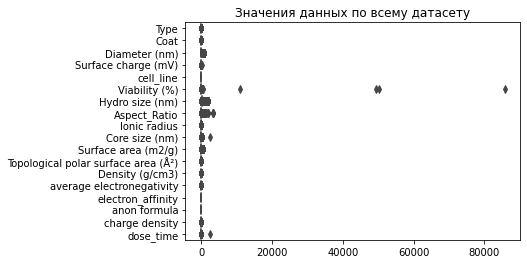

In [54]:
sns.boxplot(data=df, orient="h")
plt.title('Значения данных по всему датасету')
plt.show()

In [55]:
def drop_outliers_max(df, column, threshhold):
    df.drop(df.index[df[column] > threshhold], inplace=True)


In [56]:
threshholds=[['Surface charge (mV)', 100], ['Viability (%)', 200], ['Aspect_Ratio', 100], ['Core size (nm)', 100]]

In [57]:
for column in threshholds:
    drop_outliers_max(df, column[0], column[1])

In [58]:
def drop_outliers_min(df, column, threshhold):
    df.drop(df.index[df[column] < threshhold], inplace=True)
threshholds=[['dose_time', 1e-10], ['Surface charge (mV)', -100]]

In [59]:
for column in threshholds:
    drop_outliers_min(df, column[0], column[1])

In [60]:
df["if_oxide"]=df['Material type'].apply(lambda row: 1 if ('O' in row) else 0)

In [61]:
from scipy.stats import chi2_contingency #хи-квадрат для категориальных признаков
data = pd.crosstab(df['cell_line'], df['Cell_Source'])
stat, p, dof, expected = chi2_contingency(data)
alpha = 0.05
print("Рассчитанные значения хи-квадрат для категориальных признаков 'cell_line' и 'Cell_Source'")
print( f"p-value: {p}")
if p <= alpha:
    print ( 'Зависимы' )
else :
    print ( 'Независимы' )


data = pd.crosstab(df['if_oxide'], df['anon formula'])
stat, p, dof, expected = chi2_contingency(data)
print("Рассчитанные значения хи-квадрат для категориальных признаков 'if_oxide' и 'anon formula'")
print( f"p-value: {p}")
if p <= alpha:
    print ( 'Зависимы' )
else :
    print ( 'Независимы' )

Рассчитанные значения хи-квадрат для категориальных признаков 'cell_line' и 'Cell_Source'
p-value: 1.239167941930015e-104
Зависимы
Рассчитанные значения хи-квадрат для категориальных признаков 'if_oxide' и 'anon formula'
p-value: 0.0
Зависимы


In [62]:
numerical_features = []
categ = ['Material type', 'Cell_Source', 'Elements', 'anon formula']
for i in df.columns:
  if i not in set(categ):
    numerical_features.append(i)

**Scaling данных**

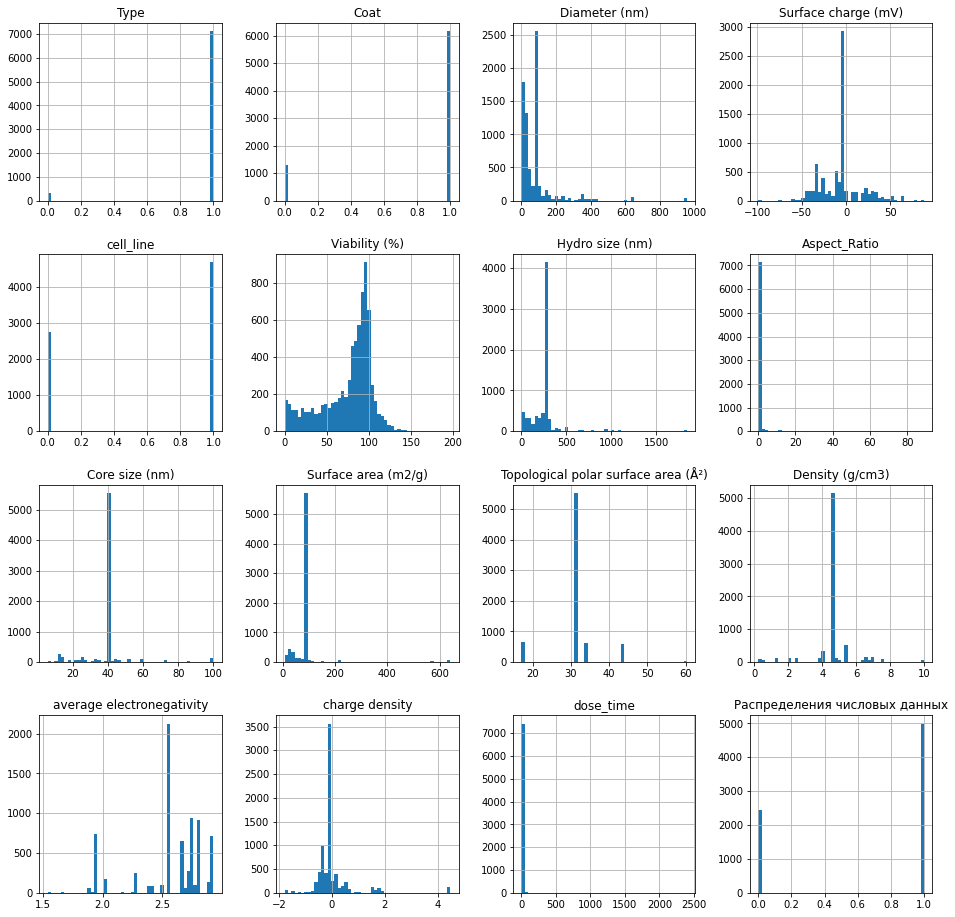

In [64]:
%matplotlib inline
df.hist(bins=50, figsize=(16,16))
plt.title('Распределения числовых данных')
plt.show()
#приблизительно нормальные: 'Density (g/cm3)', 'Surface charge (mV)', 'charge density'

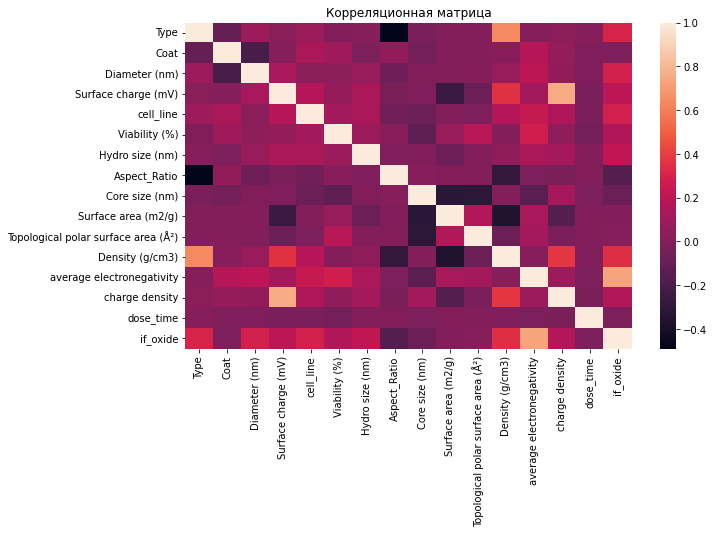

In [70]:
# корреляционная матрица

data_corr=df.corr()
plt.figure(figsize = (10,6))
plt.title('Корреляционная матрица')
sns.heatmap(data_corr)
plt.show()

In [65]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [66]:
normal_features=['Density (g/cm3)', 'Surface charge (mV)', 'charge density']
other_features = []
for i in numerical_features:
  if i not in set(normal_features):
    other_features.append(i)

In [67]:
df1=df.drop((categ+other_features), axis=1)

In [68]:
df2=df.drop((categ+normal_features), axis=1)

In [69]:
scaling=StandardScaler()

In [71]:
scaling.fit(df1)
stand_scaled=scaling.transform(df1)

In [72]:
scaling=MinMaxScaler()

In [73]:
scaling.fit(df2)
min_max_scaled=scaling.transform(df2)

In [74]:
df1=pd.DataFrame(stand_scaled)
df2=pd.DataFrame(min_max_scaled) 

In [75]:
df1.rename(columns = {0: 'Surface charge (mV)', 1: 'Density (g/cm3)', 2:'charge density'}, inplace=True)

In [76]:
df2.rename(columns = {0: 'Type', 1: 'Coat', 2: 'Diameter (nm)', 3: 'cell_line', 4: 'Viability (%)',
       5: 'Hydro size (nm)', 6: 'Aspect_Ratio', 7: 'Ionic radius', 8: 'Core size (nm)',
       9: 'Surface area (m2/g)', 10: 'Topological polar surface area (Å²)',
       11: 'average electronegativity', 12: 'electron_affinity', 13: 'dose_time',
       14: 'if_oxide'}, inplace=True)

In [77]:
dataset=pd.concat([df1, df2.reindex(df1.index)], axis=1)

In [78]:
dataset.to_csv('final.csv')

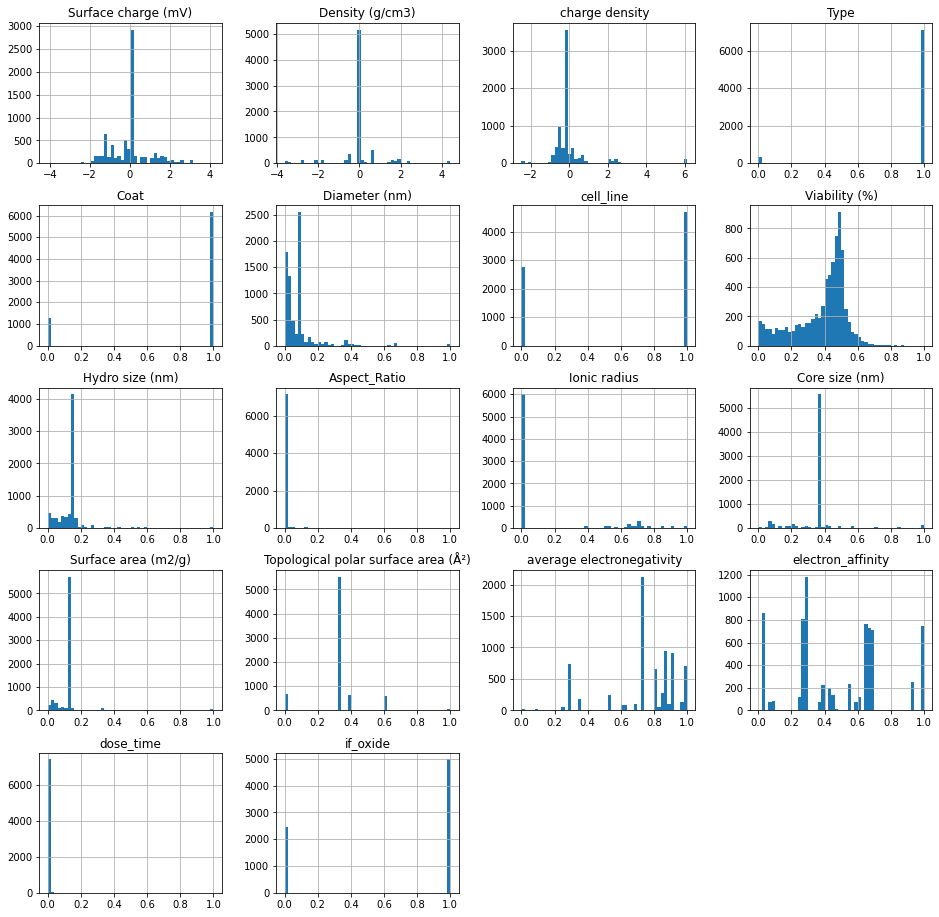

In [79]:
%matplotlib inline
dataset.hist(bins=50, figsize=(16,16))
plt.show()

In [ ]:
#dataset.to_csv('final.csv', header=True) # сохраняем в рабочую папку